### 연습 문제 5-3

In [3]:
import numpy as np
import math

In [27]:
array=np.array([[1,2,3],[2,3,4]])

In [29]:
if np.linalg.norm(array)==math.sqrt(np.diag(array.T@array).sum()):
    print(True)
else:
    print(False)

True


In [32]:
if np.linalg.norm(array)==math.sqrt(np.diag(array@array.T).sum()):
    print(True)
else:
    print(False)#결과는 동일하다.

True


### 연습 문제 5-4

In [4]:
import matplotlib.pyplot as plt

In [63]:
array=np.random.randn(100).reshape(10,10)

In [64]:
pronorm=np.linalg.norm(array)#프로베니우스 노름

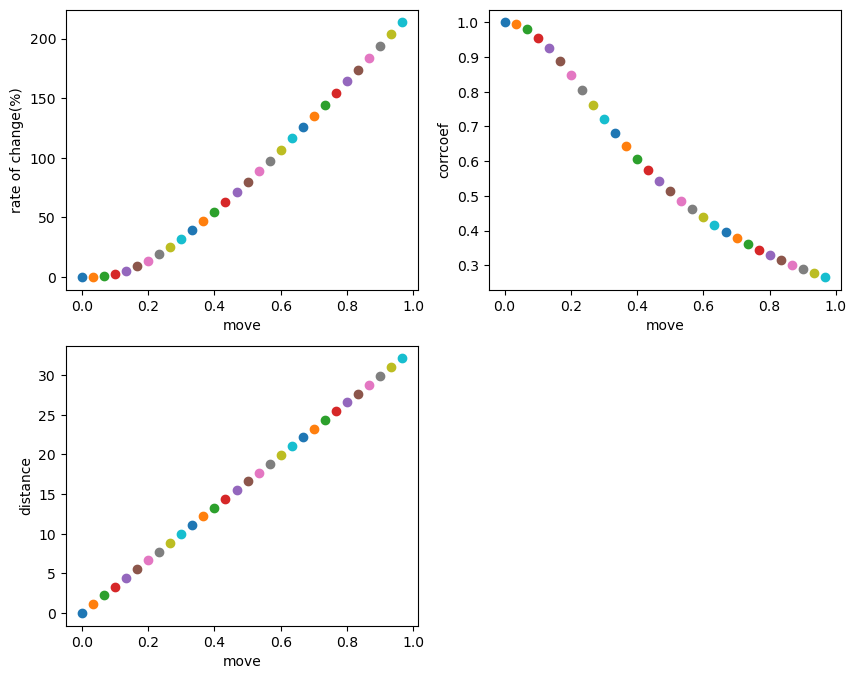

In [107]:
plt.figure(figsize=(10,8))
for i in range(30):
    k=i/30
    arraychanged=array+k*pronorm*np.eye(10)#노름 이동
    pronormchanged=np.linalg.norm(array+k*pronorm*np.eye(10))
    a=abs(pronorm-pronormchanged)/pronorm*100#변화율
    distance=np.linalg.norm(array-arraychanged)#거리
    corrnum=np.corrcoef(array.flatten(),arraychanged.flatten())[0][1]#상관 계수
    plt.subplot(2,2,1)
    plt.scatter(x=k,y=a)
    plt.xlabel("move")
    plt.ylabel("rate of change(%)")
    plt.subplot(2,2,2)
    plt.xlabel("move")
    plt.ylabel("corrcoef")
    plt.scatter(x=k,y=corrnum)
    plt.subplot(2,2,3)
    plt.xlabel("move")
    plt.ylabel("distance")
    plt.scatter(x=k,y=distance)

### 연습 문제 5-5

In [126]:
M=np.random.randint(1,7)
N=np.random.randint(1,7)
print(M,N)

3 6


In [127]:
r=2

In [128]:
array1=np.random.randn(M*r).reshape(M,r)
array2=np.random.randn(r*N).reshape(r,N)

In [131]:
randomarray=array1@array2

In [137]:
print('r<=min{M,N}일때',np.linalg.matrix_rank(randomarray))#r과 동일하다.

r<=min{M,N}일때 2


In [139]:
r=4

In [140]:
array1=np.random.randn(M*r).reshape(M,r)
array2=np.random.randn(r*N).reshape(r,N)

In [141]:
print('r>min{M,N}일때',np.linalg.matrix_rank(randomarray))#r값과 다르게 나온다 이유는..

r>min{M,N}일때 2


### 연습 문제 5-6

In [160]:
array1=np.array([[2,2],[1,2]])
array2=np.array([[-2,-2],[-1,-2]])
array3=np.array([[1,0],[0,0]])

In [161]:
print(np.linalg.matrix_rank(array1+array2))
print(np.linalg.matrix_rank(array2+array3))
print(np.linalg.matrix_rank(array1+array3))

0
1
2


In [162]:
#덧셈에 대한 구현
if np.linalg.matrix_rank(array1+array2)<=np.linalg.matrix_rank(array1)+np.linalg.matrix_rank(array2):
    print(True)
if np.linalg.matrix_rank(array2+array3)<=np.linalg.matrix_rank(array2)+np.linalg.matrix_rank(array3):
    print(True)
if np.linalg.matrix_rank(array1+array3)<=np.linalg.matrix_rank(array1)+np.linalg.matrix_rank(array3):
    print(True)

True
True
True


In [164]:
#곱셈에 대한 구현
if np.linalg.matrix_rank(array1@array2)<=max(max(array1.shape),max(array2.shape)):
    print(True)
if np.linalg.matrix_rank(array2@array3)<=max(max(array2.shape),max(array3.shape)):
    print(True)
if np.linalg.matrix_rank(array1@array3)<=max(max(array1.shape),max(array3.shape)):
    print(True)

True
True
True


### 연습 문제 5-7

In [1]:
def matrixmaking(M,r):
    return np.random.randn(M*r).reshape(M,r)@np.random.randn(M*r).reshape(r,M)

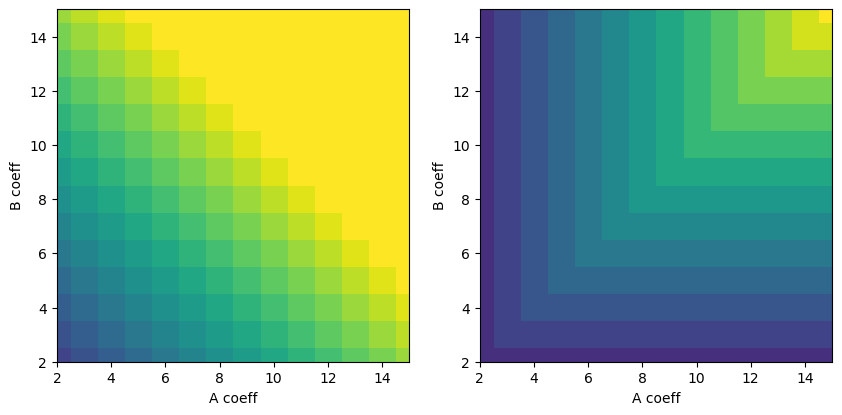

In [5]:
sum=np.zeros([22,22])
mul=np.zeros([22,22])
plt.figure(figsize=(10,8))
for i in range(2,16):
    for j in range(2,16):
        sum[i][j]=np.linalg.matrix_rank(matrixmaking(20,i)+matrixmaking(20,j))
        mul[i][j]=np.linalg.matrix_rank(matrixmaking(20,i)@matrixmaking(20,j))
        plt.subplot(1,2,1)
        plt.xlim(2, 15)
        plt.ylim(2, 15)
        plt.xlabel("A coeff")
        plt.ylabel("B coeff")
        plt.imshow(sum)
        plt.subplot(1,2,2)
        plt.xlim(2, 15)
        plt.ylim(2, 15)
        plt.xlabel("A coeff")
        plt.ylabel("B coeff")
        plt.imshow(mul)


### 연습 문제 5-8

In [6]:
A1=np.random.randn(4).reshape(2,2)
A2=np.random.randn(4).reshape(1,4)
A3=np.random.randn(8).reshape(2,4)

In [7]:
print(np.linalg.matrix_rank(A1))
print(np.linalg.matrix_rank(A1.T))
print(np.linalg.matrix_rank(A1.T@A1))
print(np.linalg.matrix_rank(A1@A1.T))

2
2
2
2


In [8]:
print(np.linalg.matrix_rank(A2))
print(np.linalg.matrix_rank(A2.T))
print(np.linalg.matrix_rank(A2.T@A2))
print(np.linalg.matrix_rank(A2@A2.T))

1
1
1
1


In [9]:
print(np.linalg.matrix_rank(A3))
print(np.linalg.matrix_rank(A3.T))
print(np.linalg.matrix_rank(A3.T@A1))
print(np.linalg.matrix_rank(A3@A3.T))

2
2
2
2


### 연습 문제 5-9

In [28]:
for i in range(10):
    A=np.random.randn(12).reshape(4,3)
    V=np.random.randn(4)
    newA=np.column_stack((V,A))
    if np.linalg.matrix_rank(A)==np.linalg.matrix_rank(newA):
        print(True)
    else: 
        print(False)

False
False
False
False
False
False
False
False
False
False


In [29]:
for i in range(10):
    A=np.random.randn(16).reshape(4,4)
    V=np.random.randn(4)
    newA=np.column_stack((V,A))
    if np.linalg.matrix_rank(A)==np.linalg.matrix_rank(newA):
        print(True)
    else: 
        print(False)

True
True
True
True
True
True
True
True
True
True


In [30]:
for i in range(10):
    A=np.random.randn(12).reshape(3,4)
    V=np.random.randn(3)
    newA=np.column_stack((V,A))
    if np.linalg.matrix_rank(A)==np.linalg.matrix_rank(newA):
        print(True)
    else: 
        print(False)

True
True
True
True
True
True
True
True
True
True
